In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading a csv file using pandas library
srate=pd.read_csv("C:/Users/manth/Assignment/Simple linear/emp_data.csv")
srate.head()

,Salary_Hike,Churn_Out_Rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [3]:
srate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Salary_Hike       10 non-null int64
Churn_Out_Rate    10 non-null int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [4]:
print(srate.isnull().sum())      #checking for null value

Salary_Hike       0
Churn_Out_Rate    0
dtype: int64


In [5]:
srate.describe() 

,Salary_Hike,Churn_Out_Rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


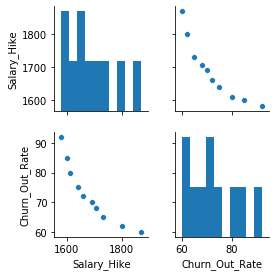

In [6]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
sns.pairplot(srate,height= 2)
plt.show()

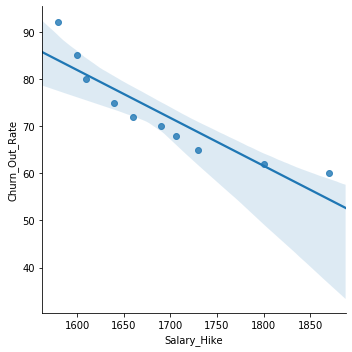

In [7]:
sns.lmplot(x = 'Salary_Hike', y='Churn_Out_Rate',data=srate)
plt.show()

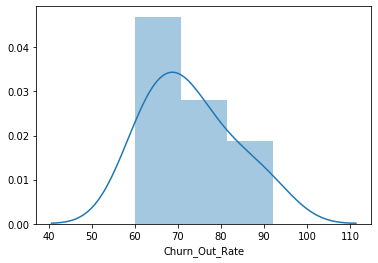

In [8]:
sns.distplot(srate['Churn_Out_Rate'])
plt.show()

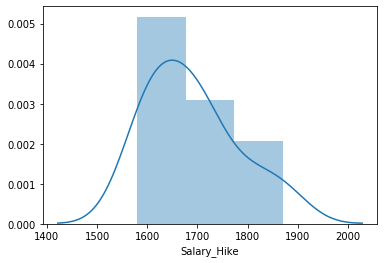

In [9]:
sns.distplot(srate['Salary_Hike'])
plt.show()

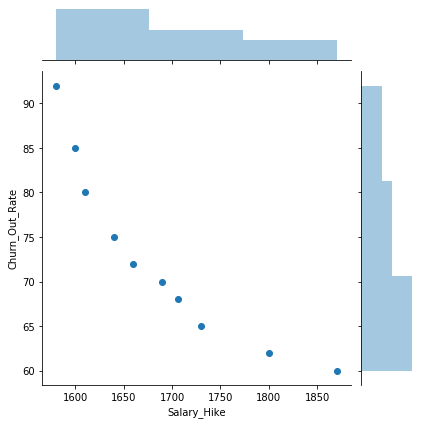

In [10]:
sns.jointplot(data = srate, x = 'Salary_Hike', y='Churn_Out_Rate')
plt.show()

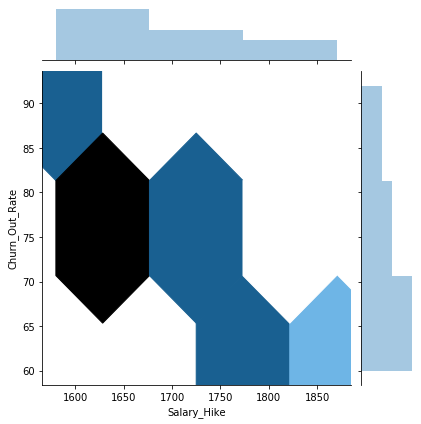

In [11]:
sns.jointplot(x = 'Salary_Hike', y='Churn_Out_Rate', kind='hex',data=srate)
plt.show()

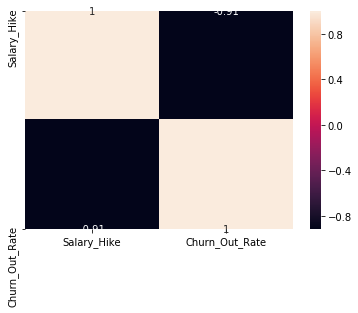

In [12]:
sns.heatmap(srate.corr(),annot=True)
plt.show()

In [13]:
#correlation value between feature and outcome
srate.corr()

,Salary_Hike,Churn_Out_Rate
Salary_Hike,1.000000,-0.911722
Churn_Out_Rate,-0.911722,1.000000


In [14]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model1 = smf.ols("Churn_Out_Rate~Salary_Hike",data=srate).fit()

# For getting coefficients of the varibles used in equation
model1.params

Intercept      244.364911
Salary_Hike     -0.101543
dtype: float64

In [15]:
model1.summary()

C:\Users\manth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_Out_Rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           0.000239
Time:                        18:53:19   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_Hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model1.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,181.291232,307.438591
Salary_Hike,-0.138845,-0.064240


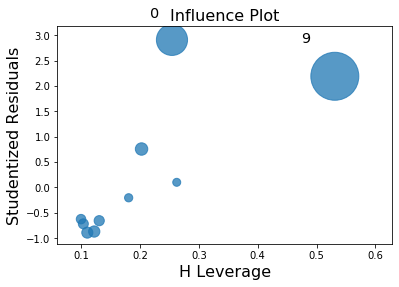

In [17]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [18]:
# Predict the value of Churn_Out_Rate using the trained model 
pred = model1.predict(srate.iloc[:,0])
pred.head()

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
dtype: float64

In [19]:
np.sqrt(np.mean((pred-srate.Churn_Out_Rate)**2))

3.9975284623377902

In [20]:
pred.corr(srate.Churn_Out_Rate)

0.9117216186909112

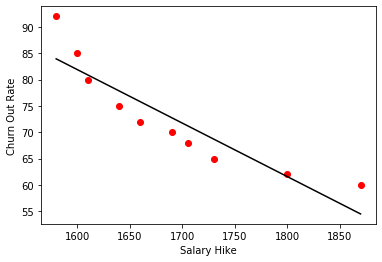

In [21]:
plt.scatter(x=srate['Salary_Hike'],y=srate['Churn_Out_Rate'],color='red');plt.plot(srate['Salary_Hike'],pred,color='black');
plt.xlabel('Salary Hike');plt.ylabel('Churn Out Rate')
plt.show()

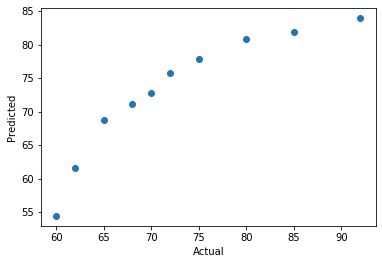

In [22]:
plt.scatter(x=srate.Churn_Out_Rate, y=pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()  

In [23]:
# Quadratic model
srate["Salary_Hike_square"]=srate.Salary_Hike*srate.Salary_Hike
srate.head()

,Salary_Hike,Churn_Out_Rate,Salary_Hike_square
0,1580,92,2496400
1,1600,85,2560000
2,1610,80,2592100
3,1640,75,2689600
4,1660,72,2755600


In [24]:
model_quad=smf.ols("Churn_Out_Rate~Salary_Hike+Salary_Hike_square",data=srate).fit()
model_quad.params

Intercept             1647.011647
Salary_Hike             -1.737089
Salary_Hike_square       0.000475
dtype: float64

In [25]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_Out_Rate   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     129.6
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.95e-06
Time:                        18:55:32   Log-Likelihood:                -18.751
No. Observations:                  10   AIC:                             43.50
Df Residuals:                       7   BIC:                             44.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1647.0116    228.059      7.222      0.000    1107.738    2186.285
Salary_Hike           -1.7371      0.266     -6.538      0.000      -2.365      -1.109
Salary_Hike_square     0.0005   7.72e-05      6.158      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.362
Skew:                           0.028   Prob(JB):                        0.835
Kurtosis:                       2.070   Cond. No.                     1.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model_quad.conf_int(0.05)

,0,1
Intercept,1107.738347,2186.284946
Salary_Hike,-2.365306,-1.108872
Salary_Hike_square,0.000293,0.000658


In [27]:
pred_quad=model_quad.predict(srate.iloc[:,:3])
pred_quad.head()

0    89.170352
1    84.663268
2    82.552343
3    76.790034
4    73.423882
dtype: float64

In [28]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-srate.Churn_Out_Rate)**2))
rmse_quad

1.5779753028678614

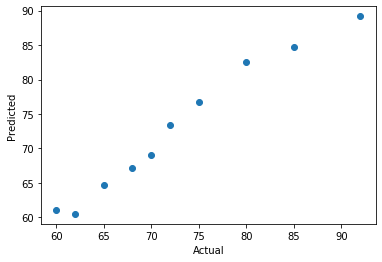

In [29]:
plt.scatter(x=srate.Churn_Out_Rate, y=pred_quad)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()